<a href="https://colab.research.google.com/github/DheerajKondan/Sms_spam_or_ham/blob/main/Sms_Spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np;
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
d1 = pd.read_csv('/content/SpamCollectionSMS.txt',header=None,sep="\t", names=['label', 'text'])
#cols = ['ham','spam']
d1
#data.shap

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [48]:
d1.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [49]:
d1.shape

(5572, 2)

In [50]:
d1.columns=["kind","message"]
d1

,kind,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [51]:
d1.describe()

,kind,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [52]:
# Assuming the unique values include 'spam' and 'ham' (lowercase)
replacement_dict = {'spam': 0, 'ham': 1}

# Replace values in the 'label' column
d1['kind'] = d1['kind'].replace(replacement_dict)



In [53]:
d1

,kind,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ã¼ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [54]:
value_counts=d1['kind'].value_counts()
value_counts

,count
kind,
1,4825
0,747


In [55]:
x=d1.loc[:,'message'].values
y=d1.loc[:,'kind'].values

In [56]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [57]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [58]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.25)

In [59]:
len(x_train),len(x_test),len(y_train),len(y_test)

(4179, 1393, 4179, 1393)

In [60]:
# Assuming 'messages' is a column containing text data in your DataFrame
messages = d1['message'].values
labels = d1['kind'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

# Use TF-IDF vectorizer for text data
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_tfidf.toarray())
x_test_scaled = scaler.transform(x_test_tfidf.toarray())


In [61]:
x_train

array(["Sorry, I'll call later", 'I am on the way to ur home',
       'Yeah, in fact he just asked if we needed anything like an hour ago. When and how much?',
       ..., "Prabha..i'm soryda..realy..frm heart i'm sory",
       'Nt joking seriously i told',
       "Sorry, I guess whenever I can get a hold of my connections, maybe an hour or two? I'll text you"],
      dtype=object)

In [62]:
x_test

array(['* You gonna ring this weekend or wot?',
       'Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/msg. CC: 08718720201 PO BOX 114/14 TCR/W1',
       'Do 1 thing! Change that sentence into: "Because i want 2 concentrate in my educational career im leaving here.."',
       ...,
       "Yes i have. So that's why u texted. Pshew...missing you so much",
       'How are you enjoying this semester? Take care brother.', 'G.W.R'],
      dtype=object)

In [63]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

<ipython-input-65-8fd26658ea30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="kind", data=d1, palette="Greens")


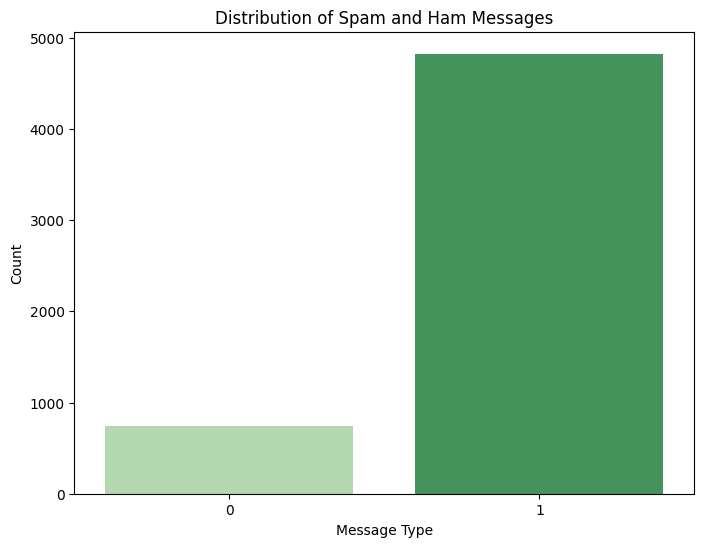

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x="kind", data=d1, palette="Greens")
plt.title("Distribution of Spam and Ham Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [66]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(d1['message'], d1['kind'], test_size=0.2, random_state=42)

# Using TF-IDF vectorizer for text data
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initializing and training the classifier (Multinomial Naive Bayes)
classifier = MultinomialNB()
classifier.fit(x_train_tfidf, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       150
           1       0.96      1.00      0.98       965

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
[[109  41]
 [  0 965]]


In [67]:
correct_predictions = 0
incorrect_predictions = 0

for x in range(len(y_pred)):
    predicted_value = y_pred[x]
    actual_value = y_test.iloc[x]

    print(f"Predicted: {predicted_value}, Actual: {actual_value}")

    if predicted_value == actual_value:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

accuracy = correct_predictions / len(y_pred)
incorrect_accuracy = incorrect_predictions / len(y_pred)

print(f"Number of correct predictions: {correct_predictions}\n")
print(f"Number of incorrect predictions: {incorrect_predictions}\n")
print(f"Accuracy: {accuracy:.2%}\n")
print(f"Incorrect Accuracy: {incorrect_accuracy:.2%}\n")


Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Ac

In [68]:
# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train_tfidf, y_train)
y_pred_lr = classifier_lr.predict(x_test_tfidf)

# Random Forest
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train_tfidf, y_train)
y_pred_rf = classifier_rf.predict(x_test_tfidf)

# K-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train_tfidf, y_train)
y_pred_knn = classifier_knn.predict(x_test_tfidf)

In [69]:
# Evaluating the models
classifiers = [("Logistic Regression", classifier_lr, y_pred_lr),
               ("Random Forest", classifier_rf, y_pred_rf),
               ("K-Nearest Neighbors", classifier_knn, y_pred_knn)]

for name, classifier, y_pred in classifiers:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Classifier:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       150
           1       0.97      1.00      0.99       965

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[121  29]
 [  0 965]]

Random Forest Classifier:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[126  24]
 [  0 965]]

K-Nearest Neighbors Classifier:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

  